In [ ]:
%load_ext autoreload
%autoreload 2
!git clone https://github.com/iMeleon/captcha-recognition-pytorch
%cd /content/captcha-recognition-pytorch
# !wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
# !unzip  captcha_images_v2.zip
# %cd ..


Cloning into 'captcha-recognition-pytorch'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 51 (delta 26), reused 27 (delta 11), pack-reused 0
Unpacking objects: 100% (51/51), done.
/content/captcha-recognition-pytorch


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
config = '''
DATA_DIR = ""
MODEL_SAVE_PATH = "
LABEL_ENCODER_SAVE_PATH = ""
BATCH_SIZE = 1
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 38
NUM_WORKERS = 8
EPOCHS = 200
DEVICE = "cuda"
'''
with open('config.py', 'w') as f:
    f.write(config)


In [ ]:
!python train.py

100% 7056/7056 [03:58<00:00, 29.58it/s]
100% 784/784 [00:26<00:00, 29.44it/s]
[('3.6', '2'), ('3.6', '2'), ('2', '2'), ('1', '2'), ('17.5', '2'), ('2', '2'), ('1.4', '2'), ('1', '1'), ('1.4', '2'), ('0.5', '1')]
Epoch=0, Train Loss=2.733660974558823, Test Loss=1.892460503786498 Accuracy=0.3469387755102041
100% 7056/7056 [01:39<00:00, 71.09it/s]
100% 784/784 [00:05<00:00, 155.69it/s]
[('3.6', '2'), ('3.6', '2'), ('2', '2'), ('1', '0.'), ('17.5', '1.'), ('2', '2'), ('1.4', '1'), ('1', '1'), ('1.4', '1'), ('0.5', '0')]
Epoch=1, Train Loss=1.5322346919218328, Test Loss=1.5825118490456775 Accuracy=0.4030612244897959
100% 7056/7056 [01:39<00:00, 71.00it/s]
100% 784/784 [00:04<00:00, 163.17it/s]
[('3.6', '3.5'), ('3.6', '0.5'), ('2', '2'), ('1', '0.5'), ('17.5', '1.'), ('2', '2'), ('1.4', '1.'), ('1', '1'), ('1.4', '1.'), ('0.5', '0.')]
Epoch=2, Train Loss=1.1007536380797784, Test Loss=1.0969973091720318 Accuracy=0.5255102040816326
100% 7056/7056 [01:39<00:00, 70.95it/s]
100% 784/784 [00:04<0

In [ ]:
import os
import glob
import torch
import numpy as np

import albumentations
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import config
import dataset
import engine
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][:-4].split('_')[0] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc)
targets_enc = targets_enc + 1


(
        train_imgs,
        test_imgs,
        train_targets,
        test_targets,
        _,
        test_targets_orig,
) = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)
    # print(len(train_imgs))
    # print(train_imgs)
    # print(len(test_imgs))
    # print(test_imgs)

#     # print(len(test_targets_orig))
#     # print(test_targets_orig)

train_dataset= dataset.ClassificationDataset(
        image_paths=train_imgs,
        targets=train_targets
        # resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
    )

RuntimeError: ignored

In [ ]:

from PIL import Image
image = np.array(Image.open(''))

In [ ]:
plt.imshow(image)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
np_img = train_dataset[2]['images']
transposed = np.transpose(np_img,(1,2,0))
plt.imshow(transposed)

NameError: ignored

In [ ]:
def decode_predictions(preds, encoder):
    preds = preds.permute(1, 0, 2)
    preds = torch.softmax(preds, 2)
    preds = torch.argmax(preds, 2)
    preds = preds.detach().cpu().numpy()
    cap_preds = []
    for j in range(preds.shape[0]):
        temp = []
        for k in preds[j, :]:
            k = k - 1
            if k == -1:
                temp.append("§")
            else:
                p = encoder.inverse_transform([k])[0]
                temp.append(p)
        tp = "".join(temp).replace("§", "")
        cap_preds.append(remove_duplicates(tp))
    return cap_preds


In [ ]:
def remove_duplicates(x):
    if len(x) < 2:
        return x
    fin = ""
    for j in x:
        if fin == "":
            fin = j
        else:
            if j == fin[-1]:
                continue
            else:
                fin = fin + j
    return fin

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


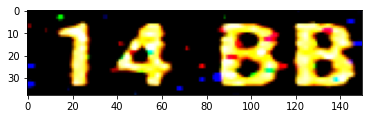

In [ ]:
x = torch.tensor(transposed).permute(2,0,1)
x = x.reshape(1,*x.shape).to('cuda')
x.shape

In [ ]:
import torch
model = torch.load('/content/gdrive/My Drive/darknet/bin/darknet/weights/model.pth')
#model.eval()
print(model)

ModuleNotFoundError: ignored

In [ ]:
vp = model(x)[0]

In [ ]:
valid_captcha_preds = []
current_preds = decode_predictions(vp, lbl_enc)
valid_captcha_preds.extend(current_preds)

In [ ]:
valid_captcha_preds

['14']